# Prediction of Bike Rentals using Linear Regression (Machine Learning)
                                                                                                   
                                                                                                   
                                                                                                   David Ugochukwu Asogwa
                                                                                                   14th October 2022
                                                                                                   Microsoft Learn Dataset

In [1]:
# import libraries with aliases
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs

%matplotlib inline
warnings.filterwarnings("ignore") # ignore all warnings for deprecated versions and libraries

Load dataset

In [2]:
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41


Renaming columns for better description

In [3]:
bike_data.rename({"instant":"id", "dteday":"date", "weathersit":"weather", "atemp":"amb_temp", "hum":"humidity",
                  "workingday":"working_day", "yr":"year", "mnth":"month", "windspeed":"wind_speed"}, axis = 1,
                  inplace = True)
bike_data.head(2)

,id,date,season,year,month,holiday,weekday,working_day,weather,temp,amb_temp,humidity,wind_speed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131


Performing descriptive statistics on selected columns.
>It is worth to state that season, year, month, holiday, weekday, working_day and weather are all categorical variables. Integers were used in this representation because of the machine learning model to be used (linear regression) which perfroms better with numerical values

In [5]:
features = ["temp", "amb_temp", "humidity", "wind_speed", "rentals"]
bike_data[features].describe()

,temp,amb_temp,humidity,wind_speed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


This reveals information about the distribution of the data in the selected fields. These includes the number of observations (731), mean value, standard deviation, minimum and maximum values and teh quartiles: 25, 50 and 75 percentiles. The 50% quartile is also the median in this case. The standard deviation of approximately 686 shows there is a lot of variance in the data set in the rentals column.

Visualizations will give a clearer view and understanding of the distribution of the dataset.

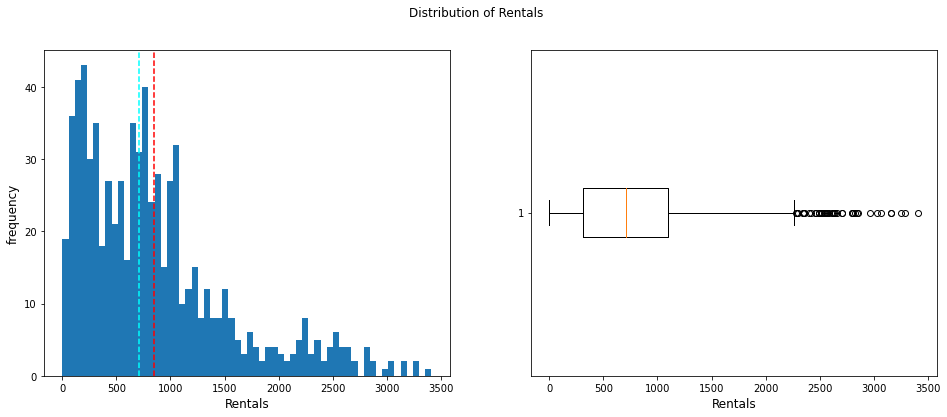

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = [16, 6])
fig.suptitle("Distribution of Rentals")

ax1.hist(bike_data.rentals, bins = 60)
ax1.set_ylabel("frequency", size = 12)
ax1.set_xlabel("Rentals", size = 12);
ax1.axvline(bike_data.rentals.mean(), color = 'red', linestyle = '--')
ax1.axvline(bike_data.rentals.median(), color = 'cyan', linestyle = '--')

ax2.boxplot(bike_data.rentals, vert = False)
ax2.set_xlabel("Rentals", size = 12);